In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [3]:
y, sr = librosa.load('../dane/audio(wideo)/non_animal/D_non-contrast_1/D_non-contrast_1/REC70.WAV')

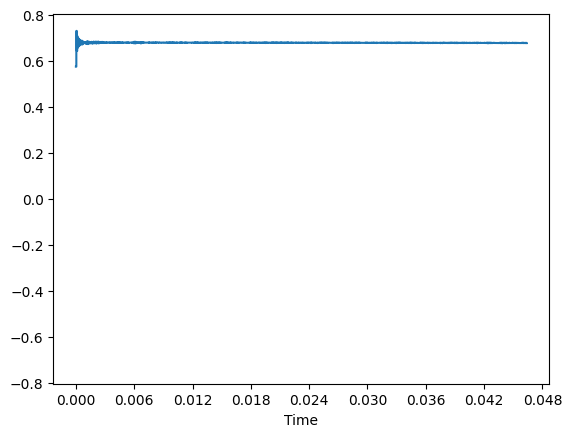

In [4]:
librosa.display.waveshow(y[:1024])

In [5]:
print(y[:5])

[0.5750158 0.7304063 0.6434955 0.7064637 0.6582016]


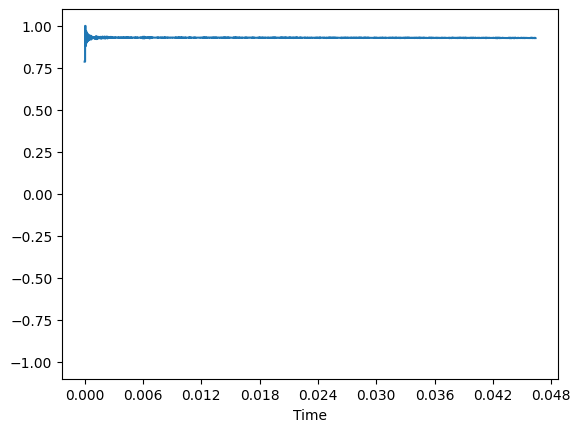

In [103]:
librosa.display.waveshow(
    librosa.util.normalize(y[:1024])
)

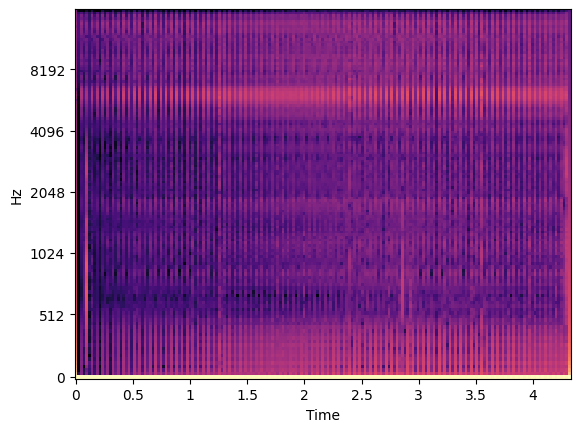

In [89]:
# librosa.display.specshow(
#     librosa.amplitude_to_db(
#         np.abs(librosa.stft(y[:1024], hop_length=1024)),
#         ref=np.max
#     ),
#     y_axis='log',
#     x_axis='time',
#     sr=sr
# )
mel = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=1024,
    hop_length=512
)
mel = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel, y_axis='mel', fmax=16000, x_axis='time');

In [90]:
def butter_bandpass(lowcut: int, highcut: int, fs: int, order: int = 5):
    return scipy.signal.butter(order, [lowcut / fs, highcut / fs], btype='band')

yf = scipy.signal.lfilter(
    *butter_bandpass(400, 3000, sr, order=5),
    y
)

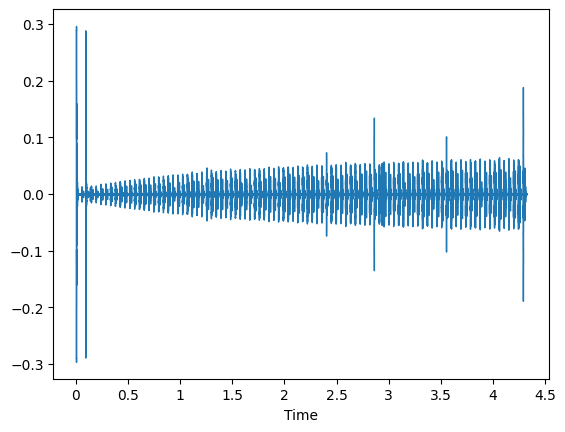

In [91]:
librosa.display.waveshow(yf)

In [84]:
onset = librosa.onset.onset_strength(
    y=yf,
    sr=sr,
    hop_length=512,
    aggregate=np.median
)

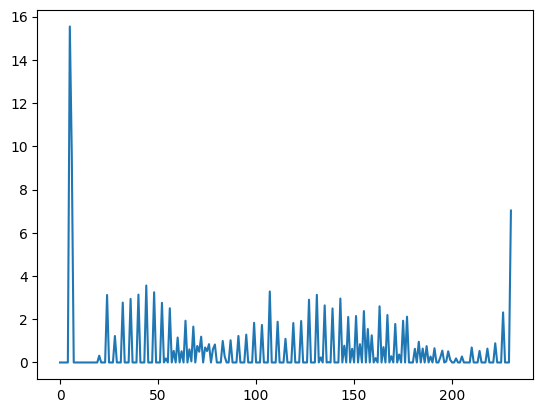

In [83]:
# librosa.display.waveshow(onset)
plt.plot(onset)

In [65]:
peaks = librosa.util.peak_pick(
    onset,
    pre_max=3,
    post_max=3,
    pre_avg=3,
    post_avg=5,
    delta=0.5,
    wait=10
)

In [69]:
librosa.frames_to_time(peaks, sr=sr)

array([0.11609977, 0.55727891, 0.83591837, 1.11455782, 1.39319728,
       1.67183673, 1.92725624, 2.20589569, 2.48453515, 2.7631746 ,
       3.04181406, 3.32045351, 3.59909297, 3.87773243, 4.2492517 ,
       4.87619048, 5.24770975])

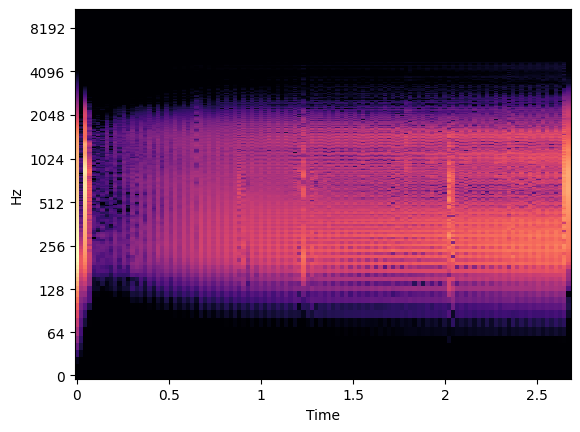

In [70]:
librosa.display.specshow(
    librosa.amplitude_to_db(
        np.abs(librosa.stft(yf, hop_length=1024)),
        ref=np.max
    ),
    y_axis='log',
    x_axis='time',
    sr=sr
)